**Загрузка библиотек**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

**Загрузка датасета**

In [2]:
date = pd.read_csv("train_data.csv")
date.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


**Подготовка данных**

In [3]:
X = date.drop(['num'], axis=1)
y = date['num']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [5]:
X_train = date.drop(['num'], axis=1)
y_train = date['num']

In [6]:
X_train.shape

(238, 2)

**Обучение модели**

In [7]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

**Расчёт entropy и information gain**

Визуализация дерева

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

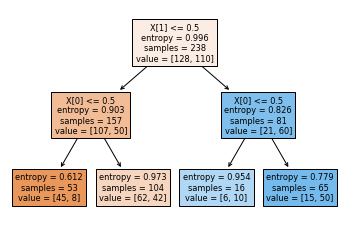

In [8]:
plot_tree(model, filled=True)

Вывод entropy и samples для левого и правого поддерева

In [9]:
l_node = model.tree_.children_left[0] 
n1 = model.tree_.n_node_samples[l_node] 
e1 = model.tree_.impurity[l_node]

In [10]:
r_node = model.tree_.children_right[0] 
n2 = model.tree_.n_node_samples[r_node] 
e2 = model.tree_.impurity[r_node]

Расчет information gain для корня дерева

In [11]:
IG = 0.996 - (n1*e1 + n2*e2) / (n1 + n2)
IG

0.11952340688606711